# Etape 1: Importation des librairies et chargement des fichiers

1-1 Importation des librairies

In [1]:
import pandas as pd

1-2 Chargement des fichiers

In [2]:
population = pd.read_csv("/content/Population 2021.csv")

In [3]:
stabilité_politique= pd.read_csv("/content/Stabilité_politique_2021.csv")

In [4]:
dispo_alimentaire = pd.read_csv("/content/Dispo_alimentaire_2021.csv")

In [5]:
importation_exportation= pd.read_csv("/content/Importation_exportation_2021.csv")

# Etape 2: Analyse exploratoire

2-1: Analyse exploratoire de fichier population

In [6]:
# Afficher les premieres lignes de  fichier population
print(population.head())

  Code Domaine                       Domaine  Code zone (M49)            Zone  \
0           OA  Séries temporelles annuelles                4     Afghanistan   
1           OA  Séries temporelles annuelles              710  Afrique du Sud   
2           OA  Séries temporelles annuelles                8         Albanie   
3           OA  Séries temporelles annuelles               12         Algérie   
4           OA  Séries temporelles annuelles              276       Allemagne   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole 

In [7]:
# Suppression des colonnes inutile
# Liste des colonnes à supprimer
colonne_a_supprimer_population = ['Code Domaine','Domaine','Code Élément','Élément','Code Produit','Produit','Code année','Année','Symbole','Description du Symbole','Note']

In [8]:
# Suppression des colonnes
population_2021 = population.drop(columns=colonne_a_supprimer_population)
print(population_2021.head())

   Code zone (M49)            Zone           Unité     Valeur
0                4     Afghanistan  1000 personnes  40099.462
1              710  Afrique du Sud  1000 personnes  59392.255
2                8         Albanie  1000 personnes   2854.710
3               12         Algérie  1000 personnes  44177.969
4              276       Allemagne  1000 personnes  83408.554


In [9]:
# Multiplier la valeur * Unité
population_2021['Valeur']= population_2021['Valeur'] * 1000

In [10]:
# Suppression de la colonne Unité
population_2021 = population_2021.drop(columns=['Unité'])

In [11]:
# Renommer la colonne valeur par population totale
population_2021 = population_2021.rename(columns={'Valeur': 'Population totale'})

In [12]:
population_2021.head()

,Code zone (M49),Zone,Population totale
0,4,Afghanistan,40099462.0
1,710,Afrique du Sud,59392255.0
2,8,Albanie,2854710.0
3,12,Algérie,44177969.0
4,276,Allemagne,83408554.0


In [13]:
# Recherche des valeurs manquantes
population_2021.isna().sum()

Code zone (M49)      0
Zone                 0
Population totale    0
dtype: int64

In [14]:
# Recherche des doublons
population_2021.duplicated().sum()

0

In [15]:
# Compter les valeurs uniques pour chaque colonne
valeurs_uniques = population_2021.nunique()
print("Valeurs uniques par colonne:")
print(valeurs_uniques)


Valeurs uniques par colonne:
Code zone (M49)      235
Zone                 235
Population totale    235
dtype: int64


In [16]:
# Afficher les types de données de chaque colonne
print(population_2021.dtypes)


Code zone (M49)        int64
Zone                  object
Population totale    float64
dtype: object


2-2: Analyse exploratoire de fichier stabilité politique

In [17]:
# Afficher les premieres lignes de  fichier stabilité politique
print(stabilité_politique.head())

  Code Domaine                             Domaine  Code zone (M49)  \
0           FS  Données de la sécurité alimentaire                4   
1           FS  Données de la sécurité alimentaire              710   
2           FS  Données de la sécurité alimentaire                8   
3           FS  Données de la sécurité alimentaire               12   
4           FS  Données de la sécurité alimentaire              276   

             Zone  Code Élément Élément  Code Produit  \
0     Afghanistan          6125  Valeur         21032   
1  Afrique du Sud          6125  Valeur         21032   
2         Albanie          6125  Valeur         21032   
3         Algérie          6125  Valeur         21032   
4       Allemagne          6125  Valeur         21032   

                                             Produit  Code année  Année  \
0  Stabilité politique et absence de violence/ter...        2021   2021   
1  Stabilité politique et absence de violence/ter...        2021   2021   
2  St

In [18]:
# Suppression des colonnes inutiles
# Liste des colonnes à supprimer
colonne_a_supprimer_stabilité_politique = ['Code Domaine','Domaine','Code Élément','Élément','Code Produit','Produit','Code année','Année','Unité','Symbole','Description du Symbole','Note']

In [19]:
# Suppression des colonnes
stabilité_politique_2021 =stabilité_politique.drop(columns=colonne_a_supprimer_stabilité_politique)
print(stabilité_politique_2021.head())

   Code zone (M49)            Zone  Valeur
0                4     Afghanistan   -2.53
1              710  Afrique du Sud   -0.71
2                8         Albanie    0.11
3               12         Algérie   -0.88
4              276       Allemagne    0.76


In [20]:
# Renommer la colonne valeur par indice de stabilité politique
stabilité_politique_2021= stabilité_politique_2021.rename(columns={'Valeur': 'Indice de stabilité politique'})
stabilité_politique_2021.head()

,Code zone (M49),Zone,Indice de stabilité politique
0,4,Afghanistan,-2.53
1,710,Afrique du Sud,-0.71
2,8,Albanie,0.11
3,12,Algérie,-0.88
4,276,Allemagne,0.76


In [21]:
# Recherche des valeurs manquantes
valeurs_manquantes = stabilité_politique_2021.isnull().sum()
print("Valeurs manquantes par colonne:")
print(valeurs_manquantes)



Valeurs manquantes par colonne:
Code zone (M49)                  0
Zone                             0
Indice de stabilité politique    0
dtype: int64


In [22]:
# Compter les valeurs uniques pour chaque colonne
valeurs_uniques = stabilité_politique_2021.nunique()
print("Valeurs uniques par colonne:")
print(valeurs_uniques)

Valeurs uniques par colonne:
Code zone (M49)                  196
Zone                             196
Indice de stabilité politique    145
dtype: int64


In [23]:
# Recherche des doublons
stabilité_politique_2021.duplicated().sum()

0

2-3: Analyse exploratoire de fichier importation_exportation

In [24]:
# Afficher les premieres lignes de  fichier importation_exportation
print(importation_exportation.head())

  Code Domaine                       Domaine  Code zone (M49)         Zone  \
0          TCL  Cultures et produits animaux                4  Afghanistan   
1          TCL  Cultures et produits animaux                4  Afghanistan   
2          TCL  Cultures et produits animaux                4  Afghanistan   
3          TCL  Cultures et produits animaux                4  Afghanistan   
4          TCL  Cultures et produits animaux                4  Afghanistan   

   Code Élément                  Élément  Code Produit (CPC)  \
0          5609  Importations - Quantité                2151   
1          5622    Importations - Valeur                2151   
2          5909  Exportations - Quantité                2151   
3          5922    Exportations - Valeur                2151   
4          5610  Importations - Quantité               21121   

                                 Produit  Code année  Année       Unité  \
0                                Poulets        2021   2021  1000 têtes

In [25]:
# Suppression des colonnes inutile
# Liste des colonnes à supprimer
colonne_a_supprimer_importation_exportation = ['Code Domaine','Domaine','Code Élément','Code Produit (CPC)','Code année','Année','Symbole','Description du Symbole','Note']

In [26]:
# Suppression des colonnes
importation_exportation_2021 =importation_exportation.drop(columns=colonne_a_supprimer_importation_exportation)
print(importation_exportation_2021.head())

   Code zone (M49)         Zone                  Élément  \
0                4  Afghanistan  Importations - Quantité   
1                4  Afghanistan    Importations - Valeur   
2                4  Afghanistan  Exportations - Quantité   
3                4  Afghanistan    Exportations - Valeur   
4                4  Afghanistan  Importations - Quantité   

                                 Produit       Unité    Valeur  
0                                Poulets  1000 têtes  12470.00  
1                                Poulets    1000 US$   5526.00  
2                                Poulets  1000 têtes      0.00  
3                                Poulets    1000 US$      0.00  
4  Viande, poulet, fraîche ou réfrigérée      tonnes  32613.38  


In [27]:
# Renommer les colonnes
importation_exportation_2021.rename(columns={
    'Élément': 'Type_Élément',
    'Produit': 'Nom_Produit',
    'Unité': 'Unité_Quantité',
    'Valeur': 'Montant'
}, inplace=True)

# Afficher le DataFrame avec les nouvelles colonnes
print(importation_exportation_2021)

      Code zone (M49)         Zone             Type_Élément  \
0                   4  Afghanistan  Importations - Quantité   
1                   4  Afghanistan    Importations - Valeur   
2                   4  Afghanistan  Exportations - Quantité   
3                   4  Afghanistan    Exportations - Valeur   
4                   4  Afghanistan  Importations - Quantité   
...               ...          ...                      ...   
1201              716     Zimbabwe    Importations - Valeur   
1202              716     Zimbabwe  Exportations - Quantité   
1203              716     Zimbabwe    Exportations - Valeur   
1204              716     Zimbabwe  Importations - Quantité   
1205              716     Zimbabwe    Importations - Valeur   

                                Nom_Produit Unité_Quantité   Montant  
0                                   Poulets     1000 têtes  12470.00  
1                                   Poulets       1000 US$   5526.00  
2                             

In [28]:
# Filtrer pour ne garder que les lignes où 'Nom_Produit' est 'Poulets'
importation_exportation_poulets = importation_exportation_2021.loc[importation_exportation_2021['Nom_Produit'] == 'Poulets']

# Afficher le DataFrame filtré
print(importation_exportation_poulets)


      Code zone (M49)            Zone             Type_Élément Nom_Produit  \
0                   4     Afghanistan  Importations - Quantité     Poulets   
1                   4     Afghanistan    Importations - Valeur     Poulets   
2                   4     Afghanistan  Exportations - Quantité     Poulets   
3                   4     Afghanistan    Exportations - Valeur     Poulets   
8                 710  Afrique du Sud  Importations - Quantité     Poulets   
...               ...             ...                      ...         ...   
1195              894          Zambie    Exportations - Valeur     Poulets   
1200              716        Zimbabwe  Importations - Quantité     Poulets   
1201              716        Zimbabwe    Importations - Valeur     Poulets   
1202              716        Zimbabwe  Exportations - Quantité     Poulets   
1203              716        Zimbabwe    Exportations - Valeur     Poulets   

     Unité_Quantité  Montant  
0        1000 têtes  12470.0  
1

In [29]:
# Supprimer la colonne 'Nom_Produit'
importation_exportation_poulets2021 =importation_exportation_poulets.drop(columns=['Nom_Produit'])

# Afficher le DataFrame filtré et modifié
print("Données filtrées pour les poulets sans la colonne 'Nom_Produit':")
print(importation_exportation_poulets2021)

Données filtrées pour les poulets sans la colonne 'Nom_Produit':
      Code zone (M49)            Zone             Type_Élément Unité_Quantité  \
0                   4     Afghanistan  Importations - Quantité     1000 têtes   
1                   4     Afghanistan    Importations - Valeur       1000 US$   
2                   4     Afghanistan  Exportations - Quantité     1000 têtes   
3                   4     Afghanistan    Exportations - Valeur       1000 US$   
8                 710  Afrique du Sud  Importations - Quantité     1000 têtes   
...               ...             ...                      ...            ...   
1195              894          Zambie    Exportations - Valeur       1000 US$   
1200              716        Zimbabwe  Importations - Quantité     1000 têtes   
1201              716        Zimbabwe    Importations - Valeur       1000 US$   
1202              716        Zimbabwe  Exportations - Quantité     1000 têtes   
1203              716        Zimbabwe    Exp

In [30]:
# Multiplier la colonne 'Montant' par 1000
importation_exportation_poulets2021['Montant'] =importation_exportation_poulets2021['Montant'] * 1000

# Supprimer la colonne 'Unité_Quantité'
importation_exportation_poulets2021 = importation_exportation_poulets2021.drop(columns=['Unité_Quantité'])

# Afficher le DataFrame modifié
print("DataFrame modifié:")
print(importation_exportation_poulets2021)

DataFrame modifié:
      Code zone (M49)            Zone             Type_Élément     Montant
0                   4     Afghanistan  Importations - Quantité  12470000.0
1                   4     Afghanistan    Importations - Valeur   5526000.0
2                   4     Afghanistan  Exportations - Quantité         0.0
3                   4     Afghanistan    Exportations - Valeur         0.0
8                 710  Afrique du Sud  Importations - Quantité    487000.0
...               ...             ...                      ...         ...
1195              894          Zambie    Exportations - Valeur  10420000.0
1200              716        Zimbabwe  Importations - Quantité     55000.0
1201              716        Zimbabwe    Importations - Valeur   5550000.0
1202              716        Zimbabwe  Exportations - Quantité    269000.0
1203              716        Zimbabwe    Exportations - Valeur   1247000.0

[556 rows x 4 columns]


In [31]:
# Pivotage des données pour transformer les types d'éléments en colonnes
importation_exportation_poulets2021 = importation_exportation_poulets2021.pivot_table(index=['Code zone (M49)', 'Zone'],
                          columns='Type_Élément',
                          values='Montant',
                          aggfunc='sum').reset_index()

# Afficher le DataFrame pivoté
print("DataFrame pivoté:")
print(importation_exportation_poulets2021)


DataFrame pivoté:
Type_Élément  Code zone (M49)                                    Zone  \
0                           4                             Afghanistan   
1                           8                                 Albanie   
2                          12                                 Algérie   
3                          24                                  Angola   
4                          28                      Antigua-et-Barbuda   
..                        ...                                     ...   
182                       860                             Ouzbékistan   
183                       862  Venezuela (République bolivarienne du)   
184                       882                                   Samoa   
185                       887                                   Yémen   
186                       894                                  Zambie   

Type_Élément  Exportations - Quantité  Exportations - Valeur  \
0                                 0.0    

In [32]:
# renommer les colonnes
importation_exportation_poulets2021 = importation_exportation_poulets2021.rename(columns={'Exportations - Quantité':'Exportations(P) - Quantité',
                                                                                          'Importations - Quantité':'Importations(P) - Quantité',
                                                                                          'Importations - Valeur':'Importations(P) - Valeur',
                                                                                          'Exportations - Valeur':'Exportations(P) - Valeur',
})

In [33]:
print(importation_exportation_poulets2021.head())

Type_Élément  Code zone (M49)                Zone  Exportations(P) - Quantité  \
0                           4         Afghanistan                         0.0   
1                           8             Albanie                         NaN   
2                          12             Algérie                         NaN   
3                          24              Angola                         0.0   
4                          28  Antigua-et-Barbuda                         0.0   

Type_Élément  Exportations(P) - Valeur  Importations(P) - Quantité  \
0                                  0.0                  12470000.0   
1                                  NaN                    565000.0   
2                                  NaN                   5489000.0   
3                                  0.0                    243000.0   
4                               2000.0                      3000.0   

Type_Élément  Importations(P) - Valeur  
0                            5526000.0  
1         

In [34]:
# Recherche des valeurs manquantes
valeurs_manquantes = importation_exportation_poulets2021.isnull().sum()
print("Valeurs manquantes par colonne:")
print(valeurs_manquantes)

Valeurs manquantes par colonne:
Type_Élément
Code zone (M49)                0
Zone                           0
Exportations(P) - Quantité    91
Exportations(P) - Valeur      91
Importations(P) - Quantité     5
Importations(P) - Valeur       5
dtype: int64


In [35]:
# remplacer les valeurs manquantes par des zéro
importation_exportation_poulets2021 = importation_exportation_poulets2021.fillna(0)

In [36]:
# Recherche des doublons
importation_exportation_poulets2021.duplicated().sum()

0

In [37]:
# Compter les valeurs uniques pour chaque colonne
valeurs_uniques = importation_exportation_poulets2021.nunique()
print("Valeurs uniques par colonne:")
print(valeurs_uniques)

Valeurs uniques par colonne:
Type_Élément
Code zone (M49)               187
Zone                          187
Exportations(P) - Quantité     78
Exportations(P) - Valeur       85
Importations(P) - Quantité    161
Importations(P) - Valeur      179
dtype: int64


2-4: Analyse exploratoire de fichier dispo_alimentaire

In [38]:
# Afficher les premieres lignes de fichier dispo_alimentaire
print(dispo_alimentaire.head(100))

   Code Domaine                      Domaine  Code zone (M49)  \
0           FBS  Bilans Alimentaires (2010-)                4   
1           FBS  Bilans Alimentaires (2010-)                4   
2           FBS  Bilans Alimentaires (2010-)                4   
3           FBS  Bilans Alimentaires (2010-)                4   
4           FBS  Bilans Alimentaires (2010-)                4   
..          ...                          ...              ...   
95          FBS  Bilans Alimentaires (2010-)               28   
96          FBS  Bilans Alimentaires (2010-)               28   
97          FBS  Bilans Alimentaires (2010-)               28   
98          FBS  Bilans Alimentaires (2010-)               28   
99          FBS  Bilans Alimentaires (2010-)               28   

                  Zone  Code Élément  \
0          Afghanistan          5511   
1          Afghanistan          5611   
2          Afghanistan          5072   
3          Afghanistan          5301   
4          Afghanis

In [39]:
# Suppression des colonnes inutile
# Liste des colonnes à supprimer
colonne_a_supprimer_dispo_alimentaire_viande_volailles = ['Code Domaine','Domaine','Code Élément','Code Produit (FBS)','Produit','Code année','Année','Symbole','Description du Symbole']

In [40]:
# Suppression des colonnes
dispo_alimentaire_viande_volailles_2021 = dispo_alimentaire.drop(columns=colonne_a_supprimer_dispo_alimentaire_viande_volailles)
print(dispo_alimentaire_viande_volailles_2021.head())

   Code zone (M49)         Zone                   Élément               Unité  \
0                4  Afghanistan                Production  Milliers de tonnes   
1                4  Afghanistan   Importations - Quantité  Milliers de tonnes   
2                4  Afghanistan        Variation de stock  Milliers de tonnes   
3                4  Afghanistan  Disponibilité intérieure  Milliers de tonnes   
4                4  Afghanistan                   Résidus  Milliers de tonnes   

   Valeur  
0    28.0  
1    33.0  
2     0.0  
3    61.0  
4     0.0  


In [41]:
# Afficher les valeurs uniques de la colonne 'Élément'
elements_uniques = dispo_alimentaire_viande_volailles_2021['Élément'].unique()

print("Différents éléments de la colonne 'Élément':")
print(elements_uniques)


Différents éléments de la colonne 'Élément':
['Production' 'Importations - Quantité' 'Variation de stock'
 'Disponibilité intérieure' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité alimentaire (Kcal)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de protéines en quantité (t)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (t)'
 'Exportations - Quantité' 'Traitement'
 'Autres utilisations (non alimentaire)' 'Alimentation pour touristes'
 'Pertes']


In [42]:
# Liste des valeurs spécifiques de la colonne 'Élément' à garder
elements_a_garder = ['Production', 'Importations - Quantité', 'Exportations - Quantité',  'Disponibilité alimentaire (Kcal/personne/jour)']

In [43]:
# Filtrer les lignes du DataFrame
dispo_alimentaire_viande_de_volailles_2021 = dispo_alimentaire_viande_volailles_2021[dispo_alimentaire_viande_volailles_2021['Élément'].isin(elements_a_garder)]

# Afficher le DataFrame filtré
print("DataFrame filtré:")
print(dispo_alimentaire_viande_de_volailles_2021)

DataFrame filtré:
      Code zone (M49)            Zone  \
0                   4     Afghanistan   
1                   4     Afghanistan   
7                   4     Afghanistan   
13                710  Afrique du Sud   
14                710  Afrique du Sud   
...               ...             ...   
2647              894          Zambie   
2652              894          Zambie   
2658              716        Zimbabwe   
2659              716        Zimbabwe   
2665              716        Zimbabwe   

                                             Élément               Unité  \
0                                         Production  Milliers de tonnes   
1                            Importations - Quantité  Milliers de tonnes   
7     Disponibilité alimentaire (Kcal/personne/jour)  Kcal/personne/jour   
13                                        Production  Milliers de tonnes   
14                           Importations - Quantité  Milliers de tonnes   
...                              

In [44]:
# Pivotage des données pour transformer les types d'éléments en colonnes
dispo_alimentaire_viande_de_volailles_2021 = dispo_alimentaire_viande_de_volailles_2021.pivot_table(index=['Code zone (M49)', 'Zone'],
                          columns='Élément',
                          values='Valeur',
                          aggfunc='sum').reset_index()

# Afficher le DataFrame pivoté
print("DataFrame pivoté:")
print(dispo_alimentaire_viande_de_volailles_2021)

DataFrame pivoté:
Élément  Code zone (M49)                                    Zone  \
0                      4                             Afghanistan   
1                      8                                 Albanie   
2                     12                                 Algérie   
3                     24                                  Angola   
4                     28                      Antigua-et-Barbuda   
..                   ...                                     ...   
181                  860                             Ouzbékistan   
182                  862  Venezuela (République bolivarienne du)   
183                  882                                   Samoa   
184                  887                                   Yémen   
185                  894                                  Zambie   

Élément  Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                  5.77   
1                                              

In [45]:
# renommage des colonnes
dispo_alimentaire_viande_de_volailles_2021 = dispo_alimentaire_viande_de_volailles_2021.rename(columns={
    'Production': 'Production(v)',
    'Importations - Quantité': 'Importations(v) - quantité',
    'Exportations - Quantité': 'Exportations(v) - quantité',
    'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire(v)(Kcal/personne/jour)'
})


In [46]:
print(dispo_alimentaire_viande_de_volailles_2021.head())

Élément  Code zone (M49)                Zone  \
0                      4         Afghanistan   
1                      8             Albanie   
2                     12             Algérie   
3                     24              Angola   
4                     28  Antigua-et-Barbuda   

Élément  Disponibilité alimentaire(v)(Kcal/personne/jour)  \
0                                                    5.77   
1                                                   83.92   
2                                                   22.05   
3                                                   31.21   
4                                                  256.09   

Élément  Exportations(v) - quantité  Importations(v) - quantité  Production(v)  
0                               NaN                        33.0           28.0  
1                               0.0                        48.0           14.0  
2                               0.0                         0.0          258.0  
3                   

In [47]:
# Recherche des valeurs manquantes
valeurs_manquantes = dispo_alimentaire_viande_de_volailles_2021.isnull().sum()
print("Valeurs manquantes par colonne:")
print(valeurs_manquantes)

Valeurs manquantes par colonne:
Élément
Code zone (M49)                                      0
Zone                                                 0
Disponibilité alimentaire(v)(Kcal/personne/jour)     0
Exportations(v) - quantité                          45
Importations(v) - quantité                           0
Production(v)                                        2
dtype: int64


In [48]:
# Filtrer les pays avec Production(v) manquant (null)
missing_production =  dispo_alimentaire_viande_de_volailles_2021[ dispo_alimentaire_viande_de_volailles_2021['Production(v)'].isnull()]

# Afficher les pays avec Production(v) manquant
print(missing_production[['Zone', 'Production(v)']])

Élément      Zone  Production(v)
58       Djibouti            NaN
104      Maldives            NaN


In [49]:
# Remplacer les valeurs manquantes avec les données correctes trouvées
dispo_alimentaire_viande_de_volailles_2021.loc[dispo_alimentaire_viande_de_volailles_2021['Zone'] == 'Djibouti', 'Production(v)'] = 16.88

In [50]:
# remplacer les valeurs manquantes par des zéro
dispo_alimentaire_viande_de_volailles_2021 = dispo_alimentaire_viande_de_volailles_2021.fillna(0)

In [51]:
# Recherche des doublons
dispo_alimentaire_viande_de_volailles_2021.duplicated().sum()

0

In [52]:
# Compter les valeurs uniques pour chaque colonne
valeurs_uniques =dispo_alimentaire_viande_de_volailles_2021.nunique()
print("Valeurs uniques par colonne:")
print(valeurs_uniques)

Valeurs uniques par colonne:
Élément
Code zone (M49)                                     186
Zone                                                186
Disponibilité alimentaire(v)(Kcal/personne/jour)    186
Exportations(v) - quantité                           57
Importations(v) - quantité                          101
Production(v)                                       129
dtype: int64


# Etape 3: Jointure

In [53]:
# Effectuer la jointure entre les dataframes
result1 = pd.merge(population_2021, stabilité_politique_2021, on=['Code zone (M49)', 'Zone'], how='outer')
result2 = pd.merge(result1, importation_exportation_poulets2021, on=['Code zone (M49)', 'Zone'], how='outer')
final_merged_data = pd.merge(result2, dispo_alimentaire_viande_de_volailles_2021, on=['Code zone (M49)', 'Zone'], how='outer')

In [54]:
final_merged_data.head()

,Code zone (M49),Zone,Population totale,Indice de stabilité politique,Exportations(P) - Quantité,Exportations(P) - Valeur,Importations(P) - Quantité,Importations(P) - Valeur,Disponibilité alimentaire(v)(Kcal/personne/jour),Exportations(v) - quantité,Importations(v) - quantité,Production(v)
0,4,Afghanistan,40099462.0,-2.53,0.0,0.0,12470000.0,5526000.0,5.77,0.0,33.0,28.0
1,710,Afrique du Sud,59392255.0,-0.71,6451000.0,9855000.0,487000.0,11856000.0,167.07,47.0,372.0,1922.0
2,8,Albanie,2854710.0,0.11,0.0,0.0,565000.0,4756000.0,83.92,0.0,48.0,14.0
3,12,Algérie,44177969.0,-0.88,0.0,0.0,5489000.0,27315000.0,22.05,0.0,0.0,258.0
4,276,Allemagne,83408554.0,0.76,255995000.0,516765000.0,138707000.0,189016000.0,65.07,586.0,768.0,1546.0


In [55]:
# Vérifier les doublons
doublons = final_merged_data.duplicated()
print("Doublons dans le DataFrame:")
print(final_merged_data[doublons])


Doublons dans le DataFrame:
Empty DataFrame
Columns: [Code zone (M49), Zone, Population totale, Indice de stabilité politique, Exportations(P) - Quantité, Exportations(P) - Valeur, Importations(P) - Quantité, Importations(P) - Valeur, Disponibilité alimentaire(v)(Kcal/personne/jour), Exportations(v) - quantité, Importations(v) - quantité, Production(v)]
Index: []


In [56]:
# Afficher les différents types des données
print(final_merged_data.dtypes)

Code zone (M49)                                       int64
Zone                                                 object
Population totale                                   float64
Indice de stabilité politique                       float64
Exportations(P) - Quantité                          float64
Exportations(P) - Valeur                            float64
Importations(P) - Quantité                          float64
Importations(P) - Valeur                            float64
Disponibilité alimentaire(v)(Kcal/personne/jour)    float64
Exportations(v) - quantité                          float64
Importations(v) - quantité                          float64
Production(v)                                       float64
dtype: object


In [57]:
# Vérifier les valeurs manquantes par colonne
valeurs_manquantes = final_merged_data.isnull().sum()
print("Valeurs manquantes par colonne:")
print(valeurs_manquantes)


Valeurs manquantes par colonne:
Code zone (M49)                                      0
Zone                                                 0
Population totale                                    0
Indice de stabilité politique                       39
Exportations(P) - Quantité                          48
Exportations(P) - Valeur                            48
Importations(P) - Quantité                          48
Importations(P) - Valeur                            48
Disponibilité alimentaire(v)(Kcal/personne/jour)    49
Exportations(v) - quantité                          49
Importations(v) - quantité                          49
Production(v)                                       49
dtype: int64


In [58]:
# Remplacer les valeurs manquantes dans les colonnes numériques par 0
final_merged_data_cleaned = final_merged_data.fillna(0)

In [59]:
# Vérifier les valeurs manquantes après le nettoyage
valeurs_manquantes_apres_nettoyage = final_merged_data_cleaned.isnull().sum()
print("Valeurs manquantes par colonne après nettoyage:")
print(valeurs_manquantes_apres_nettoyage)


Valeurs manquantes par colonne après nettoyage:
Code zone (M49)                                     0
Zone                                                0
Population totale                                   0
Indice de stabilité politique                       0
Exportations(P) - Quantité                          0
Exportations(P) - Valeur                            0
Importations(P) - Quantité                          0
Importations(P) - Valeur                            0
Disponibilité alimentaire(v)(Kcal/personne/jour)    0
Exportations(v) - quantité                          0
Importations(v) - quantité                          0
Production(v)                                       0
dtype: int64


In [60]:
final_merged_data_cleaned.shape

(235, 12)

In [61]:
print("Valeurs uniques par colonne après jointure:")
print(final_merged_data_cleaned.nunique())


Valeurs uniques par colonne après jointure:
Code zone (M49)                                     235
Zone                                                235
Population totale                                   235
Indice de stabilité politique                       145
Exportations(P) - Quantité                           78
Exportations(P) - Valeur                             85
Importations(P) - Quantité                          161
Importations(P) - Valeur                            179
Disponibilité alimentaire(v)(Kcal/personne/jour)    187
Exportations(v) - quantité                           57
Importations(v) - quantité                          101
Production(v)                                       129
dtype: int64


# Etape 4: Analyses descriptives

In [62]:
# Statistiques descriptives de base
desc_stats = final_merged_data_cleaned.describe()
print("Statistiques Descriptives de Base:")
print(desc_stats)

Statistiques Descriptives de Base:
       Code zone (M49)  Population totale  Indice de stabilité politique  \
count       235.000000       2.350000e+02                     235.000000   
mean        435.876596       3.985274e+07                      -0.061915   
std         251.256598       1.646522e+08                       0.907513   
min           4.000000       5.110000e+02                      -2.680000   
25%         220.000000       4.266395e+05                      -0.530000   
50%         438.000000       5.535992e+06                       0.000000   
75%         653.000000       2.200283e+07                       0.650000   
max         894.000000       1.457935e+09                       1.880000   

       Exportations(P) - Quantité  Exportations(P) - Valeur  \
count                2.350000e+02              2.350000e+02   
mean                 7.198732e+06              1.208733e+07   
std                  3.256345e+07              5.255171e+07   
min                  0.00000

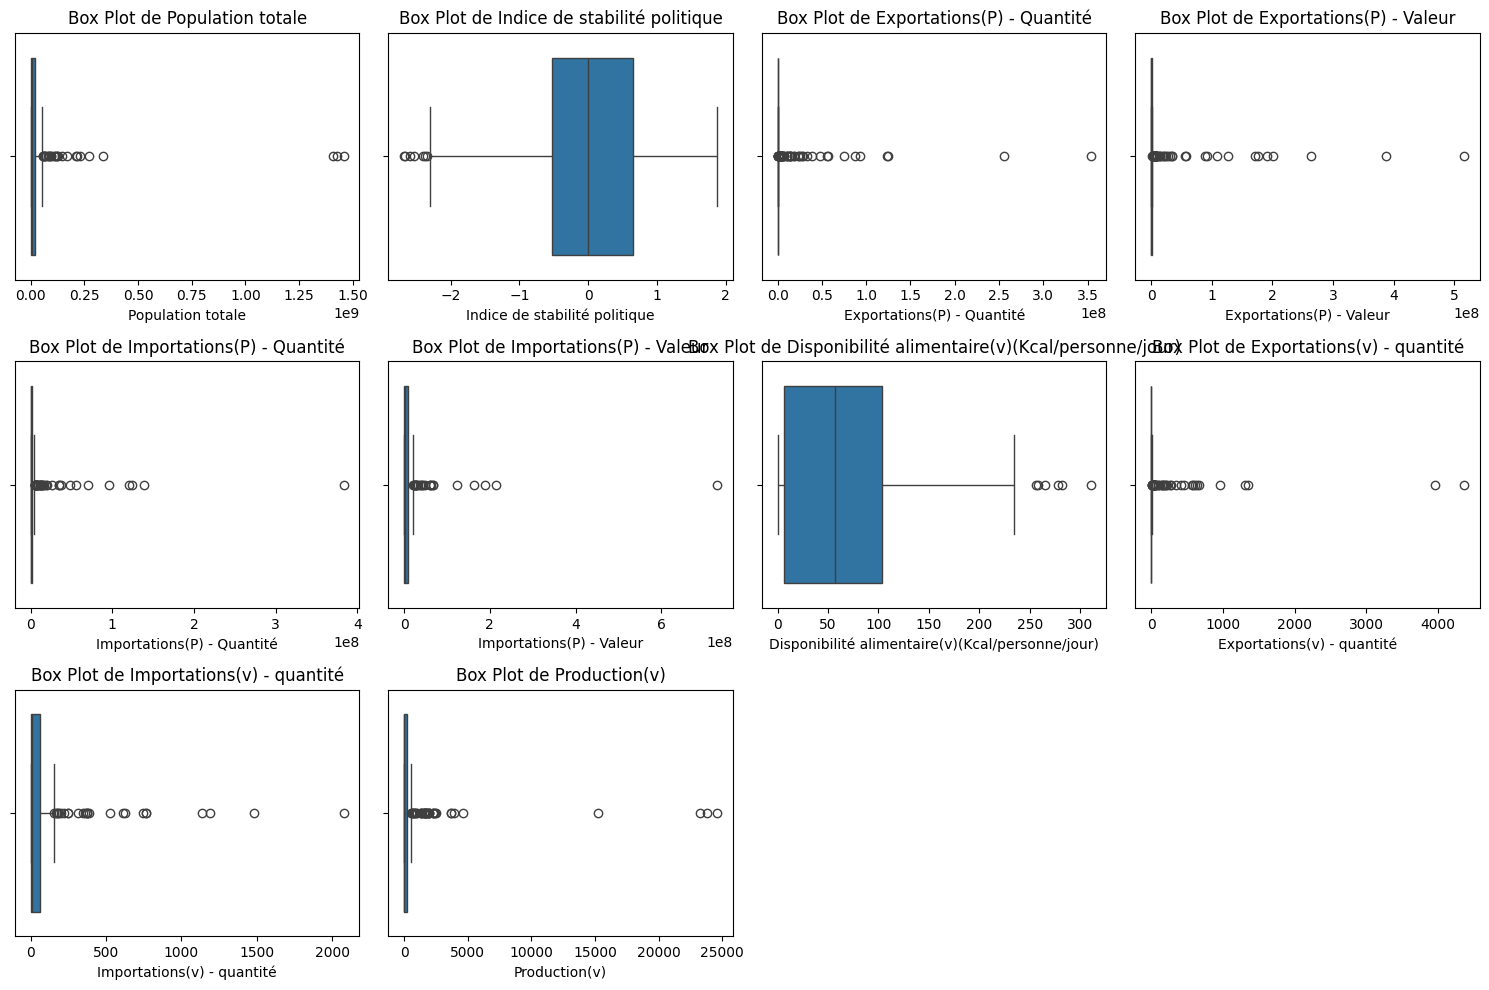

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation des box plots pour détecter les outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(final_merged_data_cleaned.columns[2:], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=final_merged_data_cleaned[col])
    plt.title(f'Box Plot de {col}')
plt.tight_layout()
plt.show()


In [64]:
# Sélectionner  les  colonnes numériques pour la matrice de corrélation
quantitative_vars = final_merged_data_cleaned.select_dtypes(include=['float64'])

In [65]:
# Calcul de la matrice de corrélation
corr_matrix = quantitative_vars.corr()

# Affichage de la matrice de corrélation
print("Matrice de Corrélation:")
print(corr_matrix)


Matrice de Corrélation:
                                                  Population totale  \
Population totale                                          1.000000   
Indice de stabilité politique                             -0.099893   
Exportations(P) - Quantité                                 0.010902   
Exportations(P) - Valeur                                   0.055520   
Importations(P) - Quantité                                -0.006173   
Importations(P) - Valeur                                   0.070675   
Disponibilité alimentaire(v)(Kcal/personne/jour)          -0.006057   
Exportations(v) - quantité                                 0.235720   
Importations(v) - quantité                                 0.592963   
Production(v)                                              0.761949   

                                                  Indice de stabilité politique  \
Population totale                                                     -0.099893   
Indice de stabilité politiqu

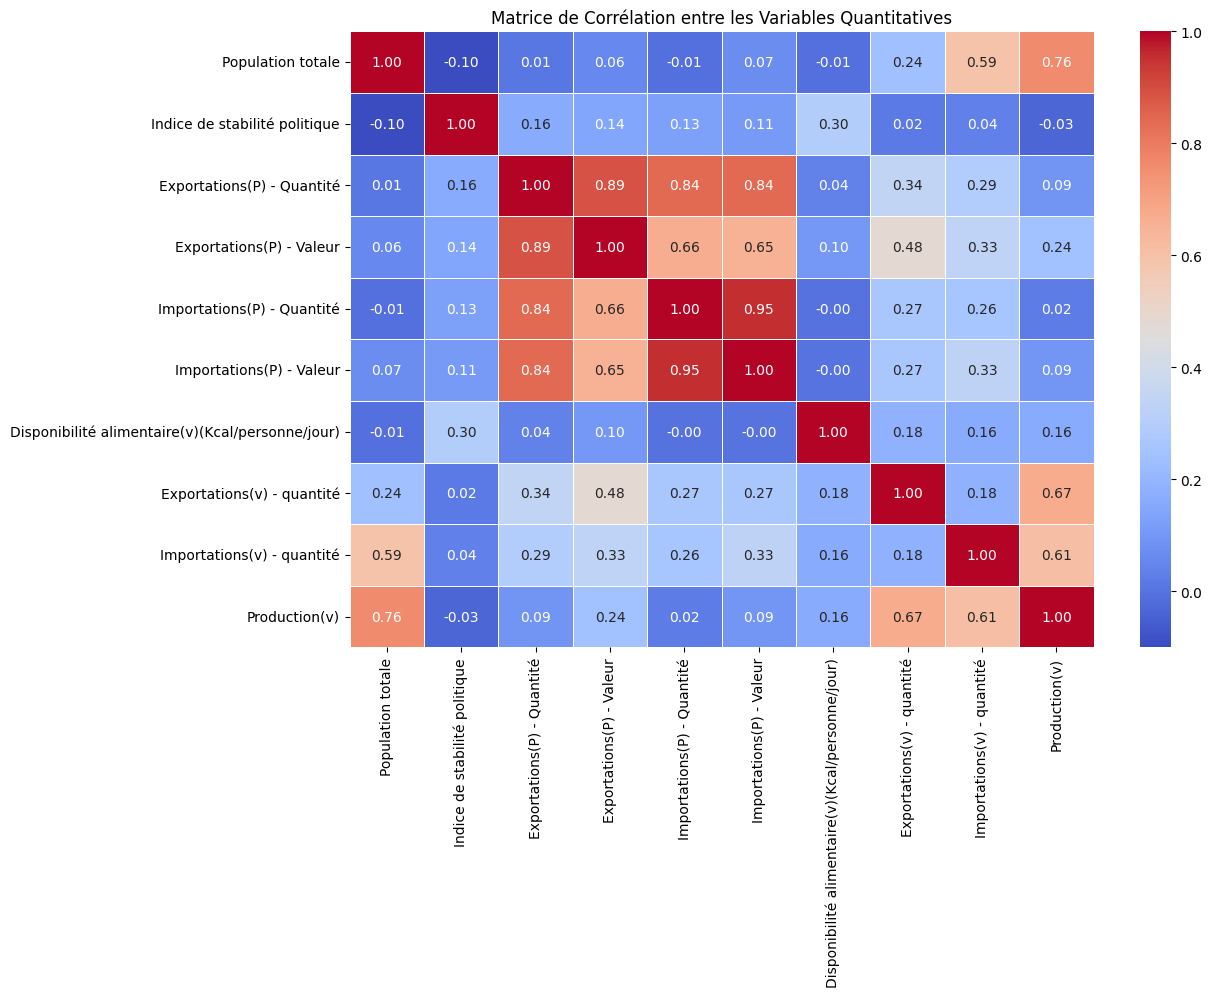

In [66]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths= 0.5)
plt.title('Matrice de Corrélation entre les Variables Quantitatives')
plt.show()


# Etape 5: Sauvegarder la DataFrame en fichier CSV

In [67]:
final_merged_data_cleaned.to_csv('final_merged_data_cleaned.csv', index=False)

print("La DataFrame a été sauvegardée en tant que fichier CSV.")


La DataFrame a été sauvegardée en tant que fichier CSV.
